In [222]:
#Objective:to determine which region the wine came from depending on the chemical analysis data.
#regions are numbered as 1,2,3
#'Class' column is the output variable
#this is a 'classification' problem.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("wine_dataset.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [223]:
df.shape

(178, 14)

In [224]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [225]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


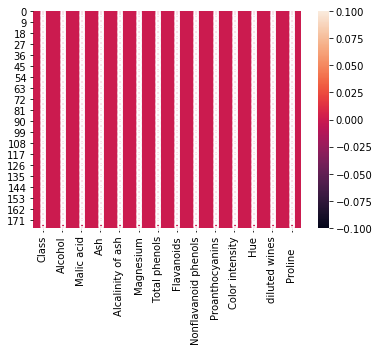

In [227]:
#to check the null values
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [228]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [229]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


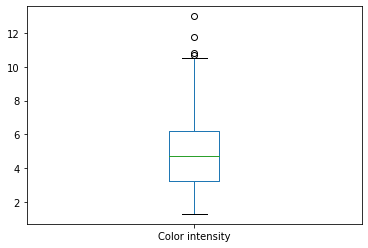

In [230]:
df['Color intensity'].plot.box()

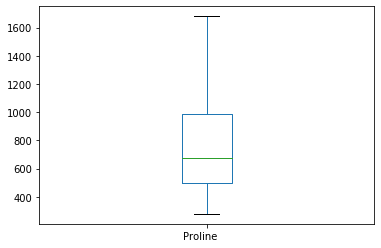

In [231]:
df['Proline    '].plot.box()

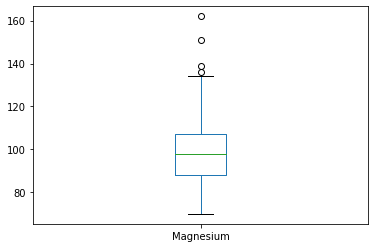

In [232]:
df['Magnesium'].plot.box()

#Magnesium column has outliers

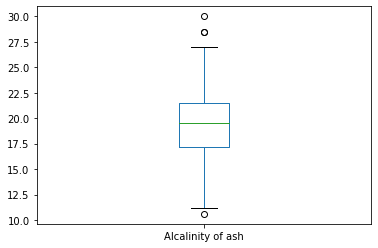

In [233]:
df["Alcalinity of ash"].plot.box()

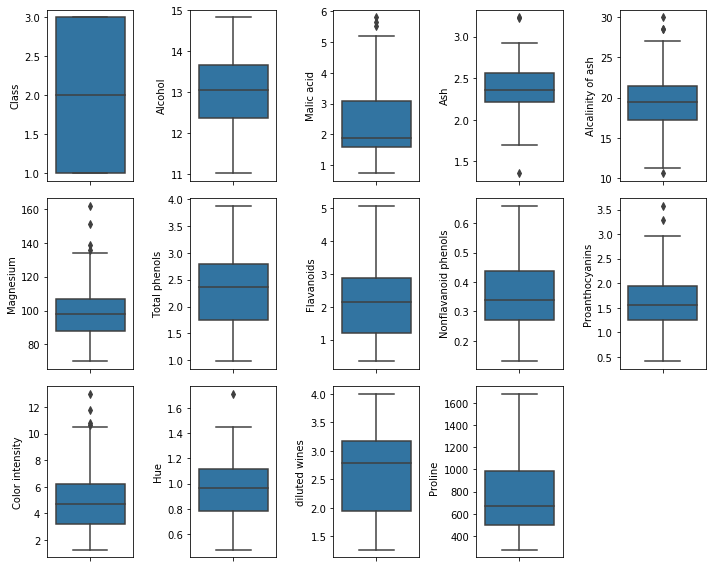

In [234]:
#to check the presence of outliers
collist=df.columns.values
nrows=3
ncols=5
plt.figure(figsize=(10,8))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],orient='v')
    plt.tight_layout()
    
#we can observe that there are outliers in Magnesium column.

In [235]:
#to check if there are outliers in the dataset.
from scipy.stats import zscore
# zr=np.abs(zscore(df))

z_score=abs(zscore(df))
print(z_score.shape)


(178, 14)


In [236]:
#removing the outliers
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.head()
df_final.shape

(168, 14)

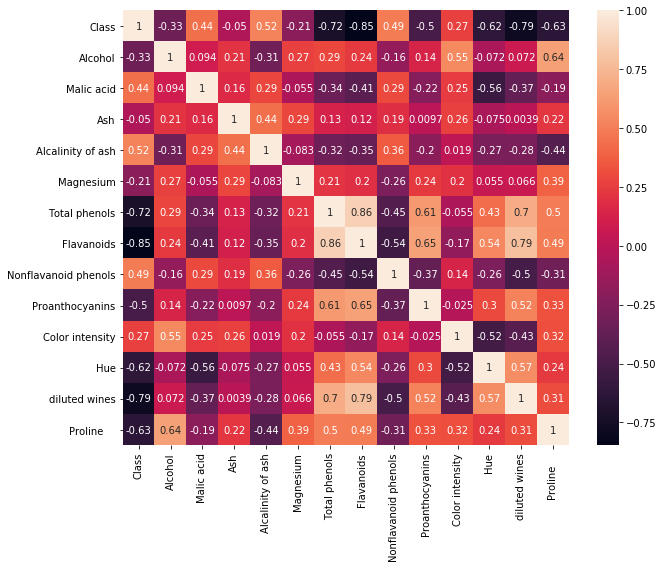

In [237]:
#to find out the correlation between the variables
dfcor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True)

#it can be obeserved from the graph,class and alcohol inversely correlated.
#Total phenols and Flavanoids are highly correlated
#Flavenoids and diluted wines are highly correlated
#Proline and Alcohol are positively correlated
#Class and Alcalinity of ash are positively correlated
#Class and Nonflavanoids are positively correlated.

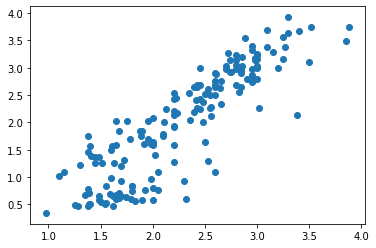

In [238]:
plt.scatter(df_final['Total phenols'],df_final['Flavanoids'])
plt.show()

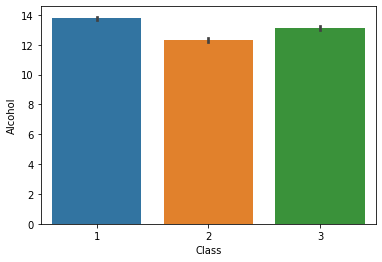

In [239]:
#to find average alchol content class wise
sns.barplot(x=df_final['Class'],y=df_final['Alcohol'])

In [240]:
#to check the skewness of the data

df.skew()

#if the values are greater than 0.55,that means that column data is skewed.

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

(array([ 4., 43., 40., 43., 24., 15.,  5.,  2.,  1.,  1.]),
 array([ 70. ,  79.2,  88.4,  97.6, 106.8, 116. , 125.2, 134.4, 143.6,
        152.8, 162. ]),
 <a list of 10 Patch objects>)

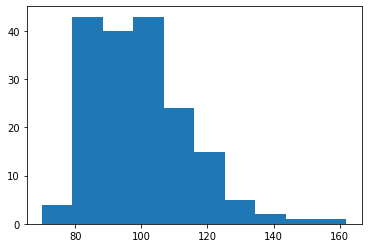

In [241]:
plt.hist(x='Magnesium',data=df,bins=10)

#data is right skewed

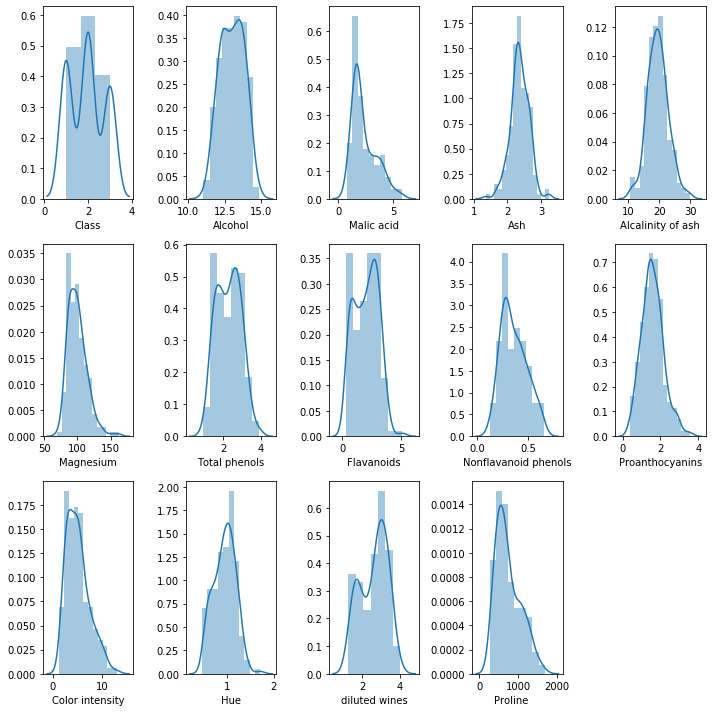

In [242]:
#to visually check skewness of all the columns
nrows=3
ncols=5
plt.figure(figsize=(10,10))
for i in range(0,len(lis)):
    #plt.figure(figsize=(8,7))
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(df[lis[i]])
    plt.tight_layout()

In [243]:
#dropping Nonflavanoid phenols,as it is negatively correlated
df.drop('Nonflavanoid phenols',axis=1,inplace=True)

In [245]:
#to split the data for input and output variables

x=df.iloc[:,1:]
y=df.iloc[:,0]
print(x.shape)
print(y.shape)

(178, 12)
(178,)


In [246]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [247]:
# now,to find out which random_state is giving highest accuracy score.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#  max_accu_score=0
# for r_state in range(42,100):
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)
    




In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [255]:
knn=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
#lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=6)
#mnb=MultinomialNB()

In [256]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",sv))
#models.append(("LogisticRegression",lr))
models.append(("DecisionTreeClassifier",dtc))
#models.append(("MultinomialNB",mnb))

In [257]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("***********",name,"**************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pred)
    print("Accuracy Score=",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross Val Score-",sc)
    cvs.append(sc*100)
    print("\n")
    print("classification report\n",classification_report(y_test,pred))
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print(cm)
    
    
   

*********** KNeighborsClassifier **************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score= 0.9444444444444444


Cross Val Score- 0.9663398692810456


classification report
               precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



[[14  0  0]
 [ 2 12  0]
 [ 0  0  8]]
*********** SVC **************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrink

In [258]:
result=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"cross_val_score":cvs})
result

,Model,Accuracy_Score,cross_val_score
0,KNeighborsClassifier,94.444444,96.633987
1,SVC,97.222222,97.777778
2,DecisionTreeClassifier,97.222222,85.947712


In [261]:
#from the result above,it is clear that SVM is performing well and hence will be the final model

from sklearn.externals import joblib
joblib.dump(sv,"svmodelfile.csv")


['svmodelfile.csv']

In [262]:
model=joblib.load("svmodelfile.csv")
model.predict(x_test)

array([3, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 3, 1, 3, 1, 1,
       1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 2, 1, 2], dtype=int64)